<a href="https://colab.research.google.com/github/Vsanku01/Deep-Learning-Tuts/blob/master/HyperParameter_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install talos

     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 8.7MB 13.3MB/s 
     |████████████████████████████████| 378kB 44.9MB/s 
     |████████████████████████████████| 109.2MB 52kB/s 
     |████████████████████████████████| 839kB 37.3MB/s 
     |████████████████████████████████| 3.2MB 44.4MB/s 
     |████████████████████████████████| 491kB 48.3MB/s 
  Created wheel for chances: filename=chances-0.1.9-cp36-none-any.whl size=41609 sha256=d759ec7298c996c15783f3c0093f268c2e8ae3514a0784ccd018c0266a944b48
  Stored in directory: /root/.cache/pip/wheels/75/33/46/c871b94249bd57d17797d049b3dff8e3a09c315afb67eb14c6
  Created wheel for wrangle: filename=wrangle-0.6.7-cp36-none-any.whl size=49894 sha256=a24733a5a1b696464234045639f0c6656a4736880914b17e89af209246bc1aca
  Stored in directory: /root/.cache/pip/wheels/bf/1b/50/d0403ce6ef269e364894da7b50db68db14c4ac62c577561e2d
  Created wheel for kerasplotlib: filename=kerasplotlib-0.1.6-cp36-none-any.whl size=3601 

In [3]:
import talos
import pandas as pd

%matplotlib inline

Using TensorFlow backend.


**Data Preparation**  

In [0]:
x, y = talos.templates.datasets.iris()

In [0]:
from talos.utils import lr_normalizer

** Model Preparation **

---



In [0]:
from keras.models import Sequential
from keras.layers import Dropout, Dense

def iris_model(x_train, y_train, x_val, y_val, params):
    
    model = Sequential()                            
    model.add(Dense(params['first_neuron'],
                    input_dim=x_train.shape[1],
                    activation='relu'))
    
    model.add(Dropout(params['dropout']))
    model.add(Dense(y_train.shape[1],
                    activation=params['last_activation']))

    model.compile(optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])),
                  loss=params['loss'],
                  metrics=['acc'])

    out = model.fit(x_train, y_train,
                    batch_size=params['batch_size'],
                    epochs=params['epochs'],
                    verbose=0,
                    validation_data=[x_val, y_val])
    
    return out, model

**Setting the Parameter Space Boundaries**

In [0]:
from keras.optimizers import Adam, Nadam
from keras.activations import softmax
from keras.losses import categorical_crossentropy, logcosh

p = {'lr': (0.1, 10, 10),
     'first_neuron':[4, 8, 16, 32, 64, 128],
     'batch_size': [2, 3, 4],
     'epochs': [200],
     'dropout': (0, 0.40, 10),
     'optimizer': [Adam, Nadam],
     'loss': ['categorical_crossentropy'],
     'last_activation': ['softmax'],
     'weight_regulizer': [None]}

**Run the Hyperparameter Scan**

In [8]:
scan_object = talos.Scan(x,
                         y, 
                         params=p,
                         model=iris_model,
                         experiment_name='iris',
                         fraction_limit=.001)

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:30<00:00,  9.47s/it]


**Access the results through the Scan object**

---



In [9]:
# accessing the results data frame
scan_object.data.head()

# accessing epoch entropy values for each round
scan_object.learning_entropy

# access the summary details
scan_object.details

experiment_name                    iris
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
complete_time            03/09/20/18:28
x_shape                        (150, 4)
y_shape                        (150, 3)
dtype: object

In [10]:
# accessing the saved models
scan_object.saved_models

# accessing the saved weights for models
scan_object.saved_weights

[[array([[-0.16635558, -0.13919936, -0.25655544,  0.03479411,  0.2506641 ,
          -0.17357102, -0.10390008,  0.06091198, -0.4043063 , -0.09313264,
           0.3713408 , -0.5655522 , -0.1332193 , -0.19393738, -0.24350451,
           0.297299  , -0.2186898 ,  0.6093859 , -0.04549107,  0.22548339,
          -0.30976677, -0.2335053 , -0.13054231, -0.34379247, -0.06139001,
          -0.5709759 ,  0.11989049,  0.33008355, -0.04271695, -0.26057532,
           0.08087051,  0.43472534],
         [-0.5434451 , -0.6279164 ,  0.19656733, -0.7746662 ,  0.75491166,
          -0.66484416,  0.16567446, -0.11360765, -0.07089993, -0.28983226,
           1.0584992 , -0.7687598 , -1.0684563 , -0.4059158 ,  0.04735863,
           1.0133023 , -0.3207546 ,  0.83001345, -0.2234465 , -0.31714985,
           0.01145795,  0.17271489, -0.16824347, -0.03130466,  0.08764544,
          -0.7450561 ,  0.897009  ,  0.5979033 , -0.274571  , -0.18619378,
          -0.32990554,  1.1016372 ],
         [ 0.80468136,  0.

In [0]:
# use Scan object as input
analyze_object = talos.Analyze(scan_object)

In [12]:
# access the dataframe with the results
analyze_object.data

,round_epochs,val_loss,val_acc,loss,acc,batch_size,dropout,epochs,first_neuron,last_activation,loss,lr,optimizer,weight_regulizer
0,200,0.280659,0.933333,0.096838,0.961905,4,0.36,200,32,softmax,categorical_crossentropy,5.05,<class 'keras.optimizers.Nadam'>,None
1,200,0.517062,0.866667,0.106983,0.971429,2,0.04,200,64,softmax,categorical_crossentropy,5.05,<class 'keras.optimizers.Adam'>,None
2,200,0.140587,0.933333,0.182127,0.942857,4,0.20,200,8,softmax,categorical_crossentropy,9.01,<class 'keras.optimizers.Nadam'>,None


In [13]:
# get the number of rounds in the Scan
analyze_object.rounds()

# get the highest result for any metric
analyze_object.high('val_acc')

# get the round with the best result
analyze_object.rounds2high('val_acc')

# get the best paramaters
analyze_object.best_params('val_acc', ['acc', 'loss', 'val_loss'])

# get correlation for hyperparameters against a metric
analyze_object.correlate('val_loss', ['acc', 'loss', 'val_loss'])

round_epochs         NaN
val_acc        -0.929799
batch_size     -0.929799
dropout        -0.621196
epochs               NaN
first_neuron    0.997929
lr             -0.783655
Name: val_loss, dtype: float64

**Analysing the Scan results with Reporting**

---



findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


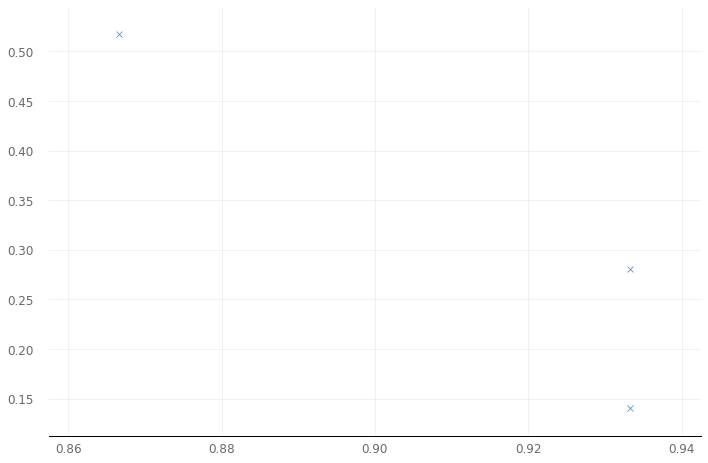

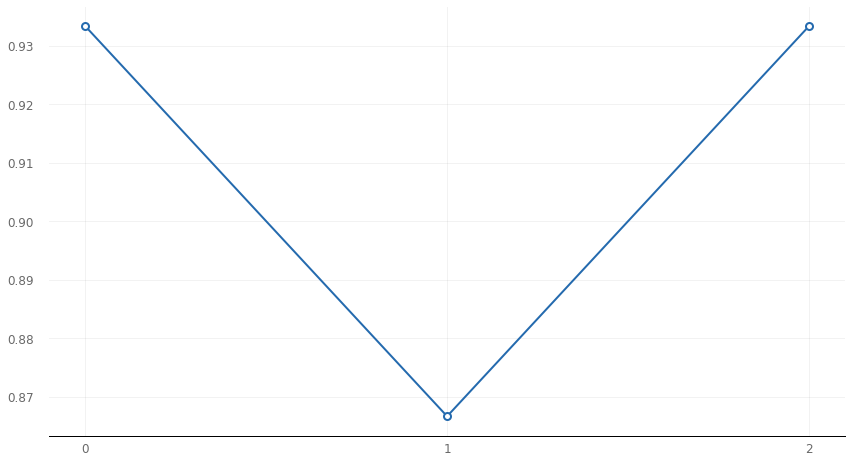

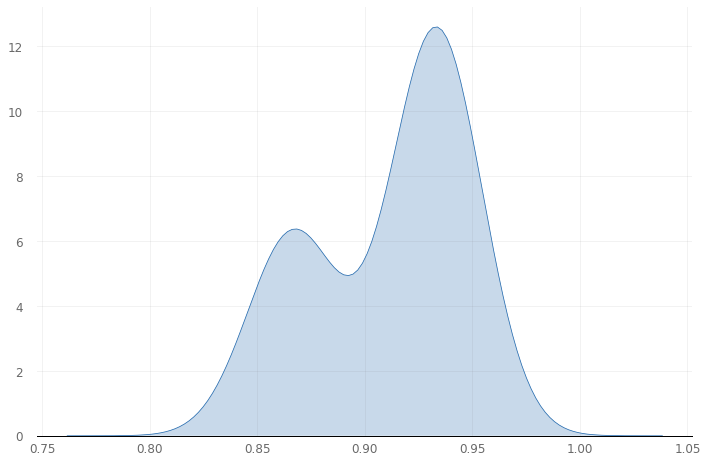

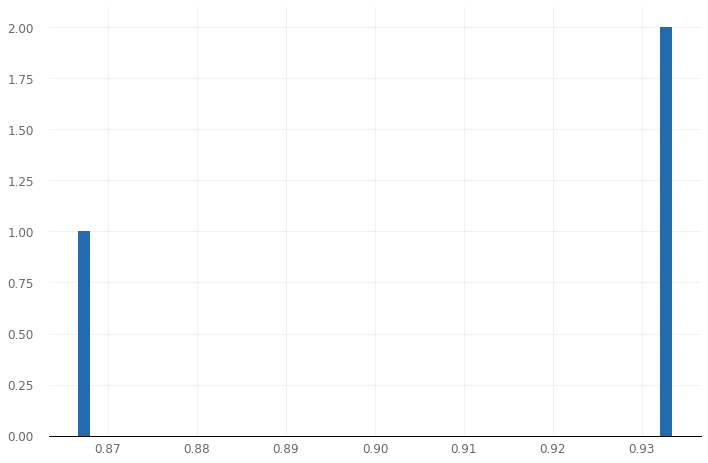

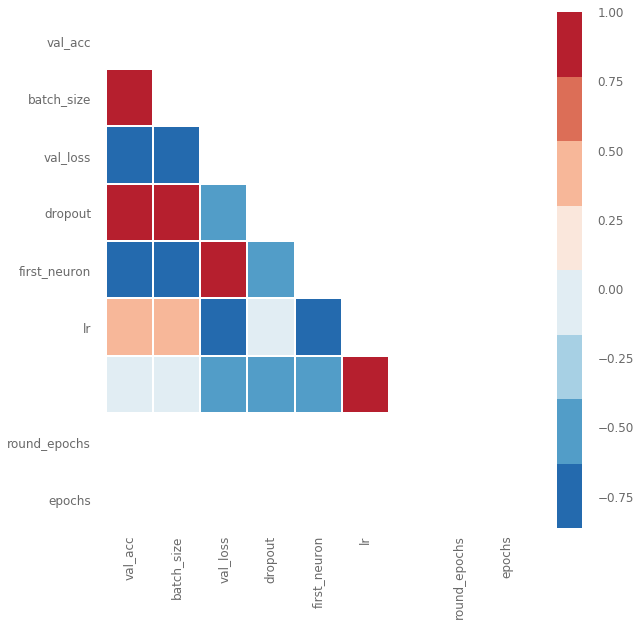

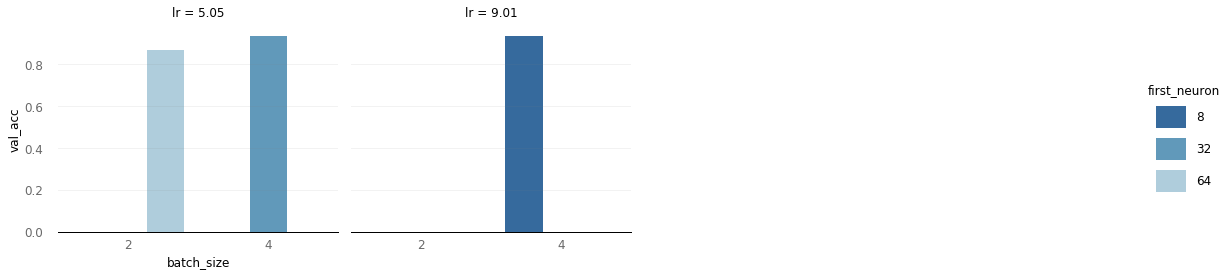

In [14]:
# a regression plot for two dimensions 
analyze_object.plot_regs('val_acc', 'val_loss')

# line plot
analyze_object.plot_line('val_acc')

# up to two dimensional kernel density estimator
analyze_object.plot_kde('val_acc')

# a simple histogram
analyze_object.plot_hist('val_acc', bins=50)

# heatmap correlation
analyze_object.plot_corr('val_loss', ['acc', 'loss', 'val_loss'])

# a four dimensional bar grid
analyze_object.plot_bars('batch_size', 'val_acc', 'first_neuron', 'lr')

**Evaluating Models with Evaluate**


---





In [15]:
evaluate_object = talos.Evaluate(scan_object)
evaluate_object.evaluate(x, y, folds=10, metric='val_acc', task='multi_label')

[1.0,
 0.8666666666666667,
 0.9407407407407407,
 1.0,
 1.0,
 1.0,
 0.8585858585858586,
 0.9259259259259259,
 1.0,
 0.9440559440559441]